In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
# Randomly check the equivalence between the maximal eigenvalue problem and the optimization problem

dim = 4
M = np.random.randn(dim, dim)
M = M + M.T  # 对称化以保证本征分解存在
print(M)

lm, u = np.linalg.eig(M)
print('\n Eigenvalues:')
print(lm)

print('\n Eigenvectors:')
print(u)

n_max = np.argmax(abs(lm))
lm_max = lm[n_max]
v_max = u[:, n_max]
print('\n The ' + str(n_max) + '-th eigenvalue is the maximal one')
print('Dominant eigenvalue = ' + str(lm_max))
print('Dominant eigenvector = ')
print(v_max)

[[-0.23699977  0.74029037  0.19926341 -0.44462407]
 [ 0.74029037  0.71792872  0.47324132  1.75475346]
 [ 0.19926341  0.47324132  2.06243397 -1.14174577]
 [-0.44462407  1.75475346 -1.14174577 -3.93667186]]

 Eigenvalues:
[-4.83004377 -0.36887762  1.45552182  2.35009063]

 Eigenvectors:
[[-0.13390826  0.93696931  0.28237085 -0.15628113]
 [ 0.32371695 -0.25620021  0.88539067 -0.21366365]
 [-0.17090423 -0.12251828 -0.20371314 -0.95618093]
 [-0.92090589 -0.20356628  0.30797894  0.12506833]]

 The 0-th eigenvalue is the maximal one
Dominant eigenvalue = -4.830043768468989
Dominant eigenvector = 
[-0.13390826  0.32371695 -0.17090423 -0.92090589]


f from the product of M and v_max = 4.830043768468987
The largest (absolute value) eigenvalue = -4.830043768468989


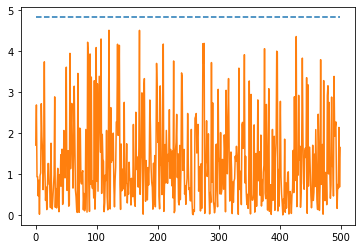

In [4]:
f_max = abs(v_max.dot(M).dot(v_max))
print('f from the product of M and v_max = ' + str(f_max))
print('The largest (absolute value) eigenvalue = ' + str(lm_max))

num_v = 500
#  随机建立多个归一化向量
vecs = np.random.randn(num_v, dim)
vecs = np.einsum('na,n->na', vecs, 1/np.linalg.norm(vecs, axis=1))
# 计算每个向量的f
f = abs(np.einsum('na,ab,nb->n', vecs, M, vecs.conj()))

# 画图展示由最大本征值给出的
x = np.arange(num_v)
y = np.ones(num_v, ) * f_max
plt.plot(x, y, '--')
plt.plot(x, f)
plt.show()


In [5]:
# 使用scipy中的eigs仅求最大几个本征值与本征向量，节省计算量
import scipy.sparse.linalg as la

lm1, v1 = la.eigs(M, k=1, which='LM')
print('The dominant eigenvalue and eigenvector by eigs:')
print(lm1)
print(v1.reshape(-1, ))

print('\nThe dominant eigenvalue and eigenvector by eig:')
print(lm_max)
print(v_max.reshape(-1, ))

The dominant eigenvalue and eigenvector by eigs:
[-4.83004377+0.j]
[ 0.13390826+0.j -0.32371695+0.j  0.17090423+0.j  0.92090589+0.j]

The dominant eigenvalue and eigenvector by eig:
-4.830043768468989
[-0.13390826  0.32371695 -0.17090423 -0.92090589]


In [6]:
def eig0(mat, it_time=100, tol=1e-15):
    """
    :param mat: 输入矩阵（实对称阵）
    :param it_time: 最大迭代步数
    :param tol: 收敛阈值
    :return lm: （绝对值）最大本征值
    :return v1: 最大本征向量
    """
    # 初始化向量
    v1 = np.random.randn(mat.shape[0],)
    v0 = copy.deepcopy(v1)
    lm = 1
    for n in range(it_time):  # 开始循环迭代
        v1 = mat.dot(v0)  # 计算v1 = M V0
        lm = np.linalg.norm(v1)  # 求本征值
        v1 /= lm  # 归一化v1
        # 判断收敛
        conv = np.linalg.norm(v1 - v0)
        if conv < tol:
            break
        else:
            v0 = copy.deepcopy(v1)
    return lm, v1

In [7]:
lm2, v2 = eig0(M)

print('\nThe dominant eigenvalue and eigenvector by the iterative method:')
print(lm2)
print(v2.reshape(-1, ))


The dominant eigenvalue and eigenvector by the iterative method:
4.830043768468986
[ 0.13390826 -0.32371695  0.17090423  0.92090589]
